In [44]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [45]:
# Load the FER2013 dataset
data = pd.read_csv('fer2013/fer2013.csv')


In [46]:
data

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [47]:
# Extract the pixel values and labels from the dataset
pixels = data['pixels'].tolist()
X = []
for sequence in pixels:
    face = [int(pixel) for pixel in sequence.split()]
    face = np.asarray(face).reshape(48, 48)
    X.append(face.astype('float32'))
X = np.asarray(X)
X = np.expand_dims(X, -1)

In [48]:
emotions = pd.get_dummies(data['emotion']).values
num_classes = emotions.shape[1]

In [49]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, emotions, test_size=0.2, random_state=42)


In [50]:
# Preprocess the data
X_train /= 255.0
X_test /= 255.0


In [51]:
# Define the CNN model architecture
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(48, 48, 1)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [52]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [53]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 conv2d_13 (Conv2D)          (None, 48, 48, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 24, 24, 128)       73856     
                                                                 
 conv2d_15 (Conv2D)          (None, 24, 24, 128)       147584    
                                                      

In [54]:
# Train the model
history = model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
449/449 [==============================] - 869s 2s/step - loss: 1.8231 - accuracy: 0.2464 - val_loss: 1.8143 - val_accuracy: 0.2459
Epoch 2/10
449/449 [==============================] - 841s 2s/step - loss: 1.8173 - accuracy: 0.2516 - val_loss: 1.8123 - val_accuracy: 0.2459
Epoch 3/10
449/449 [==============================] - 854s 2s/step - loss: 1.8159 - accuracy: 0.2516 - val_loss: 1.8101 - val_accuracy: 0.2459
Epoch 4/10
449/449 [==============================] - 849s 2s/step - loss: 1.8145 - accuracy: 0.2516 - val_loss: 1.8109 - val_accuracy: 0.2459
Epoch 5/10
449/449 [==============================] - 847s 2s/step - loss: 1.8139 - accuracy: 0.2516 - val_loss: 1.8121 - val_accuracy: 0.2459
Epoch 6/10
449/449 [==============================] - 877s 2s/step - loss: 1.8133 - accuracy: 0.2516 - val_loss: 1.8105 - val_accuracy: 0.2459
Epoch 7/10
449/449 [==============================] - 852s 2s/step - loss: 1.8122 - accuracy: 0.2516 - val_loss: 1.8097 - val_accuracy: 0.2459

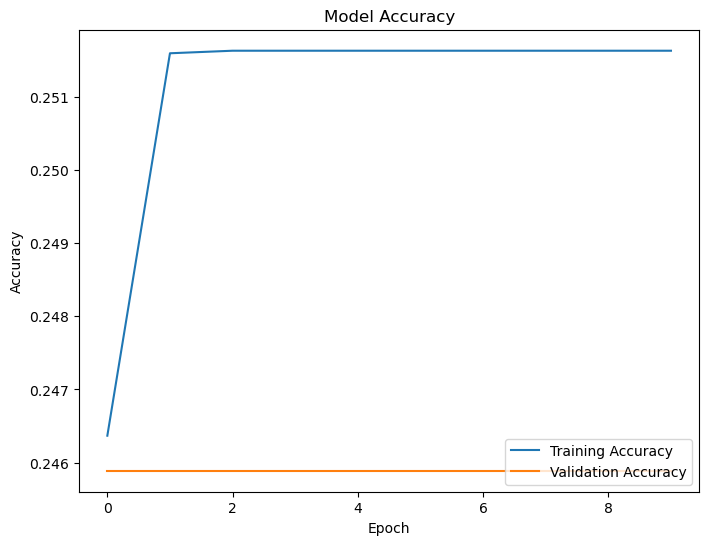

In [55]:
# Plot the training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

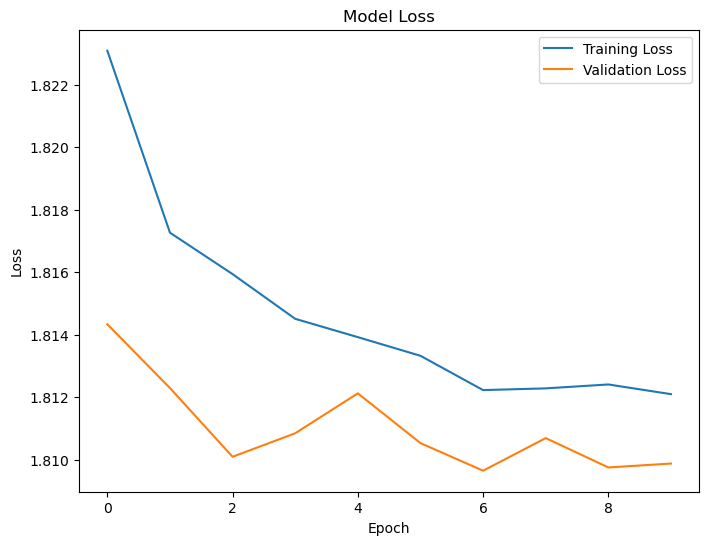

In [56]:
# Plot the training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()